In [1]:
import sys
sys.path.append("../src/")
sys.path.append("../src/AtomicH")

In [2]:
import elastic
import constants
import potentials
import numpy as np
import pylab as plt

In [13]:

r0       = 1e-9
pin      = 1e-4
intlimit = 100 * constants.BohrInAng/constants.hcInEVAngstrom
rhos = np.linspace(r0, intlimit, 100)

muH=constants.HydrogenConstants.mu
muT=constants.TritiumConstants.mu

aT=elastic.GetScatteringLength(rhos, pin, 0, muT, potentials.Silvera_Triplet, 'Radau')*constants.hcInEVAngstrom
aH=elastic.GetScatteringLength(rhos, pin, 0, muH, potentials.Silvera_Triplet, 'Radau')*constants.hcInEVAngstrom


sigT=elastic.GetCrossSection(rhos, pin, 0, muT, potentials.Silvera_Triplet, 'Radau')*constants.hcInEVAngstrom**2*1e-20
sigH=elastic.GetCrossSection(rhos, pin, 0, muH, potentials.Silvera_Triplet, 'Radau')*constants.hcInEVAngstrom**2*1e-20

In [14]:

print("H s-wave triplet scattering length in pm: " + str(aH[-1]*100))
print("T s-wave triplet scattering length in pm: " + str(aT[-1]*100))


#print("T s-wave triplet cross section in m^2: " + str(sigT[-1]))
#print("H s-wave triplet cross section in m^2: " + str(sigH[-1]))

H s-wave triplet scattering length in pm: 71.32577773182905
T s-wave triplet scattering length in pm: -4184.923693386094


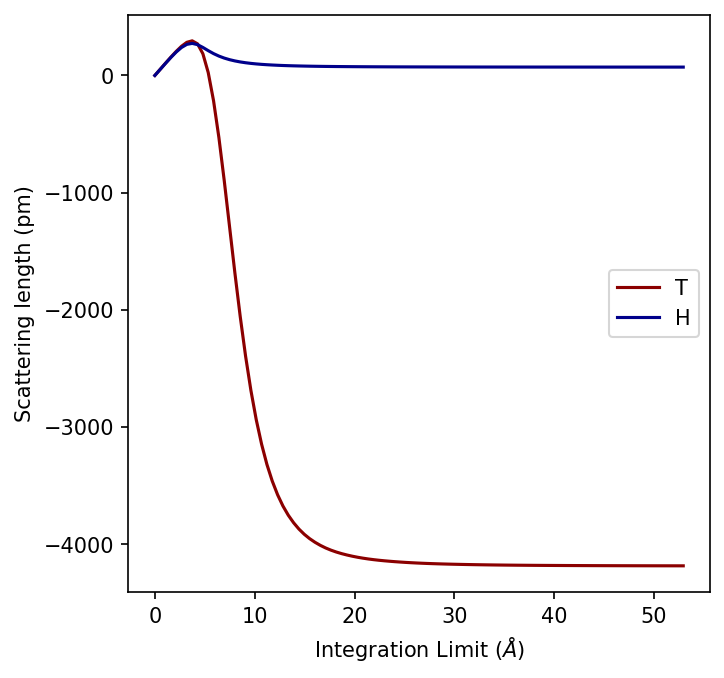

In [11]:
plt.figure(figsize=(5,5),dpi=150)
plt.xlabel(r"Integration Limit ($\AA$)")
plt.ylabel("Scattering length (pm)")
plt.plot(rhos*constants.hcInEVAngstrom,aT*100,label='T',color='DarkRed')
plt.plot(rhos*constants.hcInEVAngstrom,aH*100,label='H',color='DarkBlue')
plt.legend(loc='center right')


In [9]:
ms=np.linspace(0.1,4,100)
aVsMT=[]
aVsMS=[]
for m in ms:
    mu=m*constants.DaltonInEV/2
    aVsMT.append(elastic.GetScatteringLength(rhos, pin, 0, mu, potentials.Silvera_Triplet, 'Radau')[-1]*constants.hcInEVAngstrom*100)
    aVsMS.append(elastic.GetScatteringLength(rhos, pin, 0, mu, potentials.Jamieson_Kolos_Mixed, 'Radau')[-1]*constants.hcInEVAngstrom*100)

(0.0, 4.0)

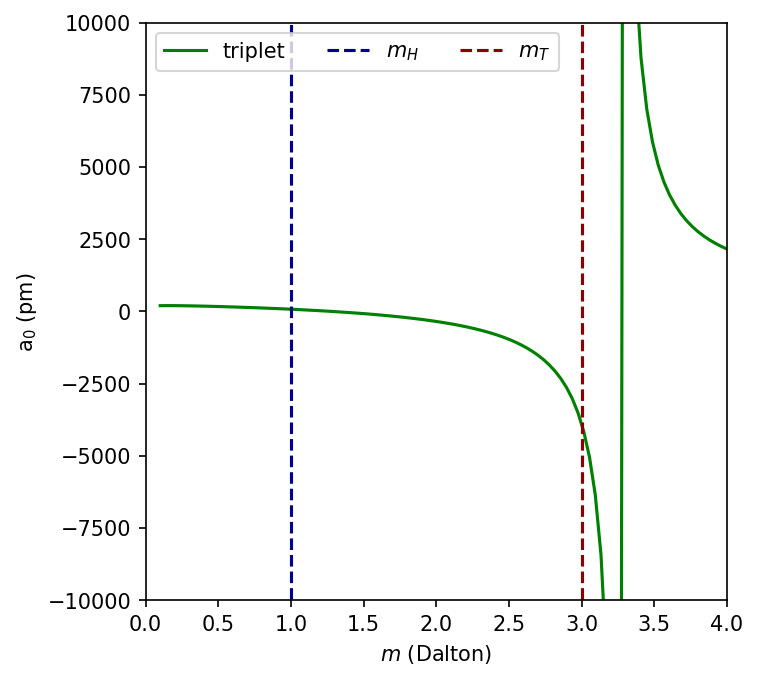

In [12]:
plt.figure(figsize=(5,5),dpi=150)
plt.xlabel("$m$ (Dalton)")
plt.ylabel(r"a$_0$ (pm)")
plt.plot(ms,aVsMT,color='green',label=r'triplet')
#plt.plot(ms,aVsMS,color='purple',label=r'singlet')
plt.plot([1,1],[-100000,45000],'--',color='DarkBlue',label=r'$m_H$')
plt.plot([3,3],[-100000,45000],'--',color='DarkRed',label=r'$m_T$')
plt.ylim(-10000,10000)
plt.legend(loc='upper left',ncol=3)
plt.xlim(0,4)